In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [18]:
#handling missing values when there is true we have missing values

df.isnull().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [23]:
#check how many are null values 

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
# way of removing missing values

# 1.we can simply delete the values and row if missing value 

df.shape

(891, 15)

In [30]:
#we should not delete the row here 
df.dropna().shape

(182, 15)

In [31]:
# can we remove the columns 
# it will drop age and dec because it consist of NA values 
df.dropna(axis=1)

#make inplace = True if you want to have a permamnent operation

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


### Imputation missing values techniques



1. Mean value imputaion technique 

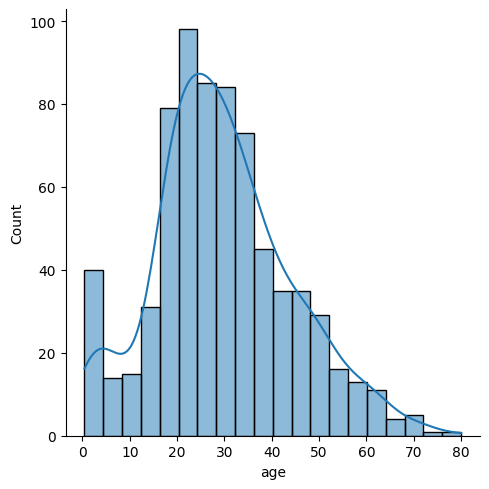

In [41]:
#displot distribution plot bolte h isse 
sns.displot(df['age'],kde=True)

<Axes: xlabel='age', ylabel='Count'>

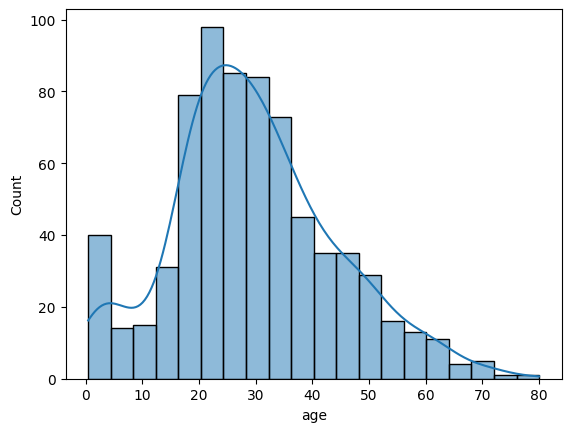

In [42]:
#both are same used for plotting distribution plot 
sns.histplot(df['age'],kde=True)

In [47]:
# we have to handle missing values of age so we can simply fill mean of age at missing values in age col

df['age_mean'] = df['age'].fillna(df['age'].mean())

In [51]:
df.drop('age_median',axis=1, inplace=True)

In [53]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000


#### 2. Median value imputation if we have outliers in dataset that is why we take here median 

In [56]:
#it will be filled up by the median
df['age_median']=df['age'].fillna(df['age'].median())

### 3. Mode imputation technique (Categorical Values)

In [59]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [60]:
df['embarked'].unique() #it will show just the unique values

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
#here i will take only values which are not NA and i will find the mode of them 

mode_value= df[df['embarked'].notna()]['embarked'].mode()[0]

In [68]:
#now I will fill this value to NA in embarked col

df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [83]:
df['embarked'].isnull().sum()

np.int64(2)